# Manoeuvres d'un satellite

## Partie 1 - Trajectoire

On décrit le mouvement d'un objet de masse $m$, dans un référentiel galiléen, avec des forces de frottement négligeables.

À l'aide de la deuxième loi de Newton ou le Principe Fondamental de la dynamique (PFD) on a:

$$
\sum_i \vec{F_i} = m . \vec{a} 
$$

> tu pourras travailler ici

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
# Global variables
# G = 6.67e-11 # m3 kg-1 s-2
G = 4 * np.pi ** 2

In [3]:
# Set initial Position and speed
r_0 = 1.0 # radius orbit
M = 1.0 # Mass 

v = np.sqrt(G * M / r_0)

print(v)

6.283185307179586


In [5]:
def derivee(v,t):
    # Initialisation de la dérivée
    dv = np.empty(v.shape)
    # Dérivée de la vitesse
    dv[0] = v[2]
    dv[1] = v[3]
    r = np.sqrt( v[0] ** 2 + v[1] ** 2 )
    dv[2] = -( G * M * v[0] ) / r ** 3
    dv[3] = -( G * M * v[1] ) / r ** 3

    return dv

In [98]:
x_0 = 1 # Position initial
v_y_0 = 4. # Tangencial speed

# x0, y0, vx0, vy0
X0 = [ x_0, 0, 0, v_y_0]

t0 = 0.
tf = 10
tau = .001

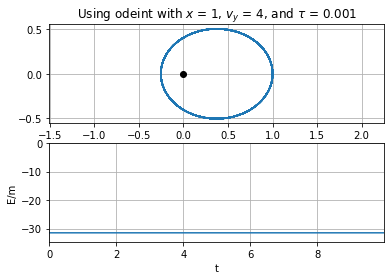

In [102]:
t = np.arange(t0, tf, tau)

X = odeint(derivee, X0, t)
x = X[:,0] 
y = X[:,1]

vx = X[:,2] # values at any given time index
vy = X[:,3]

plt.subplot(2,1,1)
plt.title(r'Using odeint with $x$ = %g, $v_y$ = %g, and $\tau$ = %g' \
      % (x_0,v_y_0,tau))
plt.plot(x,y)

centerx = 0.
centery = 0.
plt.plot(centerx,centery,'ko')
plt.axis('equal')
plt.grid()

plt.subplot(2,1,2)
eps = 0.5*(vx**2 + vy**2) - G*M/np.sqrt(x**2 + y**2)
plt.plot(t,eps)
eps_plot_min = 1.1 * np.min(eps)
plt.axis([np.min(t),np.max(t),eps_plot_min,0])
plt.xlabel('t')
plt.ylabel('E/m')
plt.grid()

plt.show()

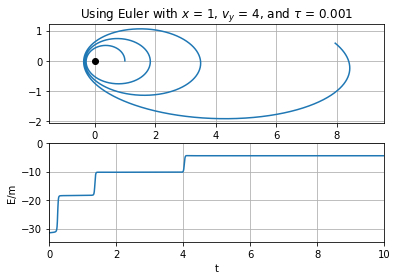

In [103]:
def Euler(start, end, step, v_ini, derivee):
    '''
        Application de la méthode d'Euler
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((4, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        v[:, i + 1] = v[:, i] + step * derivee(v[:, i], t[i])

    # Argument de sortie
    return t, v

# Méthode d'Euler
t, v = Euler(t0, tf, tau, X0, derivee)

x = v[0,:] 
y = v[1,:]

plt.subplot(2,1,1)
plt.title(r'Using Euler with $x$ = %g, $v_y$ = %g, and $\tau$ = %g' \
      % (x_0,v_y_0,tau))
plt.plot(x,y)
centerx = 0.
centery = 0.
plt.plot(centerx,centery,'ko')
plt.axis('equal')
plt.grid()


plt.subplot(2,1,2)
vx = v[2,:] # values at any given time index
vy = v[3,:]
eps = 0.5*(vx**2 + vy**2) - G*M/np.sqrt(x**2 + y**2)
plt.plot(t,eps)
eps_plot_min = 1.1 * np.min(eps)
plt.axis([np.min(t),np.max(t),eps_plot_min,0])
plt.xlabel('t')
plt.ylabel('E/m')
plt.grid()

plt.show()

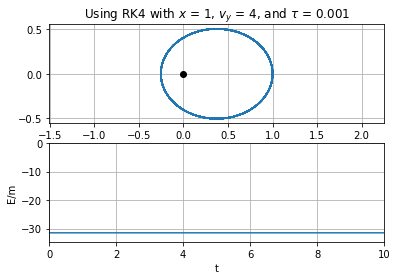

In [104]:
def rk4(start, end, step, v_ini, derivee, ordre):
    '''
        Application de la méthode rk4
    '''
    # Création du tableau temps
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # Tableau temps t

    # Initialisation du tableau v
    v = np.empty((ordre, num_points))

    # Condition initiale
    v[:, 0] = v_ini 

    # Boucle for
    for i in range(num_points - 1):
        d1 = derivee(v[:, i], t[i])
        d2 = derivee(v[:, i] + step / 2 * d1, t[i] + step / 2)
        d3 = derivee(v[:, i] + step / 2 * d2, t[i] + step / 2)
        d4 = derivee(v[:, i] + step * d3, t[i] + step)
        v[:, i + 1] = v[:, i] + step / 6 * (d1 + 2 * d2 + 2 * d3 + d4)

    # Argument de sortie
    return t, v

# Méthode d'Euler
t, v = rk4(t0, tf, tau, X0, derivee, ordre=4)

x = v[0,:] 
y = v[1,:]

plt.subplot(2,1,1)
plt.title(r'Using RK4 with $x$ = %g, $v_y$ = %g, and $\tau$ = %g' \
      % (x_0,v_y_0,tau))
plt.plot(x,y)
centerx = 0.
centery = 0.
plt.plot(centerx,centery,'ko')
plt.axis('equal')
plt.grid()


plt.subplot(2,1,2)
vx = v[2,:] # values at any given time index
vy = v[3,:]
eps = 0.5*(vx**2 + vy**2) - G*M/np.sqrt(x**2 + y**2)
plt.plot(t,eps)
eps_plot_min = 1.1 * np.min(eps)
plt.axis([np.min(t),np.max(t),eps_plot_min,0])
plt.xlabel('t')
plt.ylabel('E/m')
plt.grid()

plt.show()


## Ellipse

Le mouvement d'un satellite porsuivre une trajectoire donnée par les sections coniques. On va s'intéresser pour des cas où la trajectoire donne comme résultat une ellipse.

Soient $(d)$ une droite verticale qu'on appel `directrice`, $F$ un point qui n'appartient pas à $(di)$, qu'on appellarait `foyer`, $M$ un `point` sur l'ellipse, et $d$ comme la `distance` de $M$ jusqu'à $F$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Ellipse_foyer_directrice2.svg/660px-Ellipse_foyer_directrice2.svg.png" style="display:block;margin:auto;width:400px" />

À partir de ce raisonnement on peut trouver une rélacion qu'on appel l'`excentricité` $e$.

$$
e = \frac{d(M,F)}{d(M,(d))}
$$

Dans l'ellipse on peut définir les grandeurs présents:

- `a` demi grand axe
- `b` demi petit axe
- `c` distance entre le centre el le foyer
- `h` distance avec la directrice et le foyer
- `e` excentricité $\in [0,1]$ 
- `p` demi lactus rectum

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/EllipseVal.svg/880px-EllipseVal.svg.png" style="display:block;margin:auto;width:400px" >

Dans le plane cartesienne, l'équation de l'ellipse est donné par: 

$$
\left( \frac{x}{a} \right)^2 + \left( \frac{y}{b} \right)^2 = 1
$$

Avec $a \gt b \gt 0 $.

La distance du centre jusqu'à l'une de foyers: 

$$
c = \sqrt{a^2 - b^2} 
$$

L'excentricité $e$:

$$
e = \frac{c}{a} = \frac{ \sqrt{a^2 - b^2} }{a} =  \sqrt{ 1 - \left(\frac{b}{a}\right)^2}
$$

In [ ]:
## Mon travail ce soir

## Partie 2 - Analyse de la vitesse du satellite

## Partie 3 - Analyse du transfert de Hohmann